In [2]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import os
import matplotlib.pyplot as plt
import seaborn as sbrn

%matplotlib inline

In [3]:
#Import dataset 1

df_mat = pd.read_csv('student-mat2.csv', sep=';')
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
#Import dataset 2
df_por = pd.read_csv('student-por2.csv', sep=';')
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [87]:
#joining both

df = pd.concat([df_mat, df_por],axis=0)
df.head()
print(df.shape)

(1044, 33)


In [6]:
'''
### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)
'''

#Drop tables school, paid
#Colunas que não iremos utilizar

df = df.drop(['school', 'paid'], axis= 1)

In [7]:
df.head(10)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
5,M,16,U,LE3,T,4,3,services,other,reputation,...,5,4,2,1,2,5,10,15,15,15
6,M,16,U,LE3,T,2,2,other,other,home,...,4,4,4,1,1,3,0,12,12,11
7,F,17,U,GT3,A,4,4,other,teacher,home,...,4,1,4,1,1,1,6,6,5,6
8,M,15,U,LE3,A,3,2,services,other,home,...,4,2,2,1,1,1,0,16,18,19
9,M,15,U,GT3,T,3,4,other,other,home,...,5,5,1,1,1,5,0,14,15,15


In [8]:
#No value null
df.isnull().sum()

sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
#Explore data categorically
#Checking the data distribution and possible errors that may contain

group = df.groupby(['sex']).size()
group

sex
F    591
M    453
dtype: int64

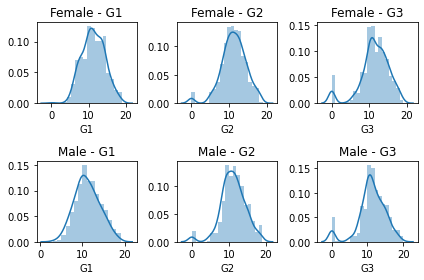

In [10]:
#Gerando o histograma por sexo e por ano para analisar a distribução das notas

plt.figure()
plt.subplot(2,3,1)
sbrn.distplot(df.loc[df.sex == 'F'].G1, hist = True).set_title('Female - G1')
plt.subplot(2,3,2)
sbrn.distplot(df.loc[df.sex == 'F'].G2, hist = True).set_title('Female - G2')
plt.subplot(2,3,3)
sbrn.distplot(df.loc[df.sex == 'F'].G3, hist = True).set_title('Female - G3')
plt.subplot(2,3,4)
sbrn.distplot(df.loc[df.sex == 'M'].G1, hist = True).set_title('Male - G1')
plt.subplot(2,3,5)
sbrn.distplot(df.loc[df.sex == 'M'].G2, hist = True).set_title('Male - G2')
plt.subplot(2,3,6)
sbrn.distplot(df.loc[df.sex == 'M'].G3, hist = True).set_title('Male - G3')
plt.tight_layout()

In [11]:
#Grouping the education of the father and mother, again to check the data distribution and possible errors that may contain

motheEducation = df.groupby(['Medu']).size()

fatherEducation = df.groupby(['Fedu']).size()

print("Mother education:\n", motheEducation)
print("Father education:\n ", fatherEducation)

Mother education:
 Medu
0      9
1    202
2    289
3    238
4    306
dtype: int64
Father education:
  Fedu
0      9
1    256
2    324
3    231
4    224
dtype: int64


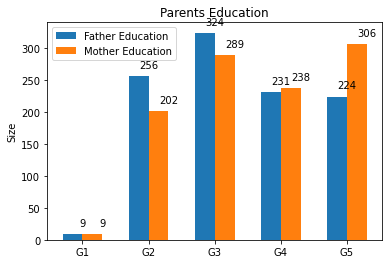

['None', 'primary education', '5th to 9th grade', 'secondary education', 'higher education']


In [12]:
#Generating a bar graph for better data visualization

labels = ['None', 'primary education', '5th to 9th grade', 'secondary education', 'higher education']

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fatherEducation, width, label='Father Education')
rects2 = ax.bar(x + width/2, motheEducation, width, label='Mother Education')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Size')
ax.set_title('Parents Education')
ax.set_xticks(x)
ax.set_xticklabels(['G1', 'G2', 'G3', 'G4', 'G5'])
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 6),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)


plt.show()
print(labels)

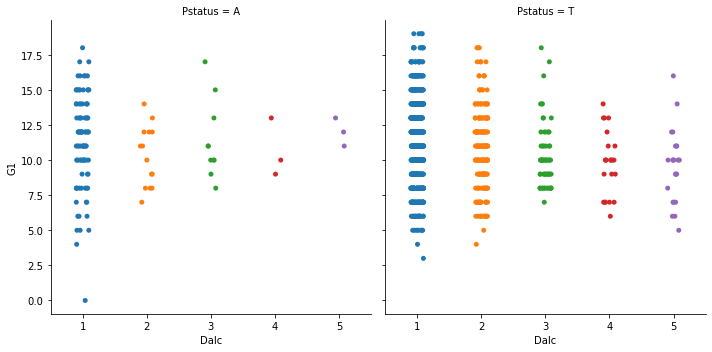

In [54]:
#Some graphics showing the relationship between a characteristic and its label applied to a category

#below we have the relationship between alcohol consumption and the performance of students,
#of separated parents (A) and not separated (T)

sbrn.catplot(x = 'Dalc', y = 'G1', data = df, col = 'Pstatus')


# Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
# G1 - first period grade (numeric: from 0 to 20)

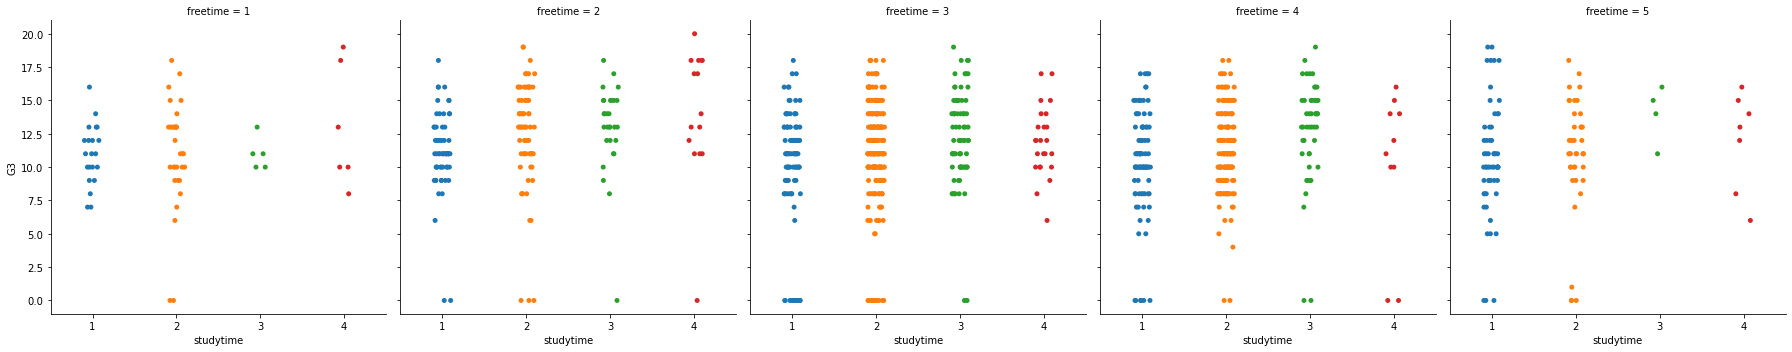

In [69]:
#below we have the relationship between studytime and the performance of students,
#of separated parents (A) and not separated (T)

sbrn.catplot(x = 'studytime', y = 'G3', data = df, col = 'freetime')

# freetime - free time after school (numeric: from 1 - very low to 5 - very high)
# studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
# G3 - final grade (numeric: from 0 to 20)

Text(0.5, 1.0, 'Without Internet')

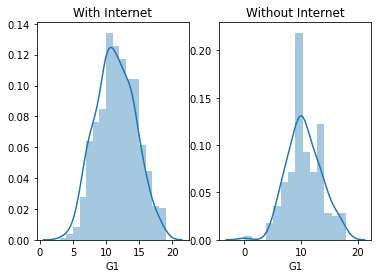

In [86]:
plt.figure()

plt.subplot(1,2,1)
sbrn.distplot(df.loc[df['internet'] == 'yes'].G1).set_title('With Internet')

plt.subplot(1,2,2)
sbrn.distplot(df.loc[df['internet'] == 'no'].G1).set_title('Without Internet')

In [66]:
#Showing all the category data by size 

def groupByType():
    allGroups = []
    allCategories = ['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
                'schoolsup', 'famsup','activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
    
    
    for idx, val in enumerate(allCategories):
        group = df.groupby(val).size()
        allGroups.append(group)
        print(group)
        print("##############")
        
#groupByType()

In [89]:
#we have only one numerical characteristic in a larger range than the others, let's see some statistical information about it
df['absences'].describe()

count    1044.000000
mean        4.434866
std         6.210017
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max        75.000000
Name: absences, dtype: float64

Text(0.5, 1.0, 'Absences')

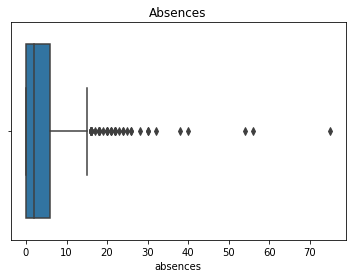

In [91]:
#A box plot to better see data dispersion using seaborn

sbrn.boxplot(df.absences).set_title('Absences')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae054dd9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae054ea0d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1ae054dd5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae054ea790>],
 'fliers': [],
 'means': []}

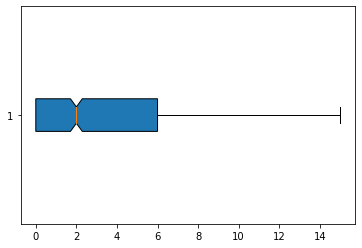

In [96]:
#Using matplotlib

plt.boxplot(df.absences, vert = False, showfliers = False, notch = True, patch_artist = True)

In [93]:
#All the category types for convert in numbers starting from 0

sex_category = ['F', 'M']
address_category = ['U', 'R']
famsize_category = ['LE3', 'GT3']
Pstatus_category = ['T', 'A']
Mjob_category = ['teacher', 'health', 'services', 'at_home', 'other']
Fjob_category = ['teacher', 'health', 'services', 'at_home', 'other']
reason_category = ['home', 'reputation', 'course', 'other']
guardian_category = ['mother', 'father', 'other']
schoolsup_category = ['yes', 'no']
famsup_category = ['yes', 'no']
activities_category = ['yes', 'no']
nursery_category = ['yes', 'no']
higher_category = ['yes', 'no']
internet_category = ['yes', 'no']
romantic_category = ['yes', 'no']


In [11]:
#Changing the string columns to a category type

def setCategoryColumns(column, categors):
    return column.astype(CategoricalDtype(categories=categors, ordered=True)).cat.codes

print(df.head())
df.sex = setCategoryColumns(df.sex, sex_category)
df.address = setCategoryColumns(df.address, address_category)
df.famsize = setCategoryColumns(df.famsize, famsize_category)
df.Pstatus = setCategoryColumns(df.Pstatus, Pstatus_category)
df.Mjob = setCategoryColumns(df.Mjob, Mjob_category)
df.Fjob = setCategoryColumns(df.Fjob, Fjob_category)
df.reason = setCategoryColumns(df.reason, reason_category)
df.guardian = setCategoryColumns(df.guardian, guardian_category)
df.schoolsup = setCategoryColumns(df.schoolsup, schoolsup_category)
df.famsup = setCategoryColumns(df.famsup, famsup_category)
df.activities = setCategoryColumns(df.activities, activities_category)
df.nursery = setCategoryColumns(df.nursery, nursery_category)
df.higher = setCategoryColumns(df.higher, higher_category)
df.internet = setCategoryColumns(df.internet, internet_category)
df.romantic = setCategoryColumns(df.romantic, romantic_category)
df.head()

  sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason  \
0   F   18       U     GT3       A     4     4  at_home   teacher  course   
1   F   17       U     GT3       T     1     1  at_home     other  course   
2   F   15       U     LE3       T     1     1  at_home     other   other   
3   F   15       U     GT3       T     4     2   health  services    home   
4   F   16       U     GT3       T     3     3    other     other    home   

   ... famrel  freetime  goout  Dalc Walc health absences  G1  G2  G3  
0  ...      4         3      4     1    1      3        6   5   6   6  
1  ...      5         3      3     1    1      3        4   5   5   6  
2  ...      4         3      2     2    3      3       10   7   8  10  
3  ...      3         2      2     1    1      5        2  15  14  15  
4  ...      4         3      2     1    2      5        4   6  10  10  

[5 rows x 31 columns]


,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,0,1,1,4,4,3,0,2,...,4,3,4,1,1,3,6,5,6,6
1,0,17,0,1,0,1,1,3,4,2,...,5,3,3,1,1,3,4,5,5,6
2,0,15,0,0,0,1,1,3,4,3,...,4,3,2,2,3,3,10,7,8,10
3,0,15,0,1,0,4,2,1,2,0,...,3,2,2,1,1,5,2,15,14,15
4,0,16,0,1,0,3,3,4,4,0,...,4,3,2,1,2,5,4,6,10,10


In [12]:
X = df.iloc[:, 0:28]
y = df['G1']
y_old = df['G1']

(array([ 50., 642., 352.]),
 array([ 0.        ,  6.33333333, 12.66666667, 19.        ]),
 <BarContainer object of 3 artists>)

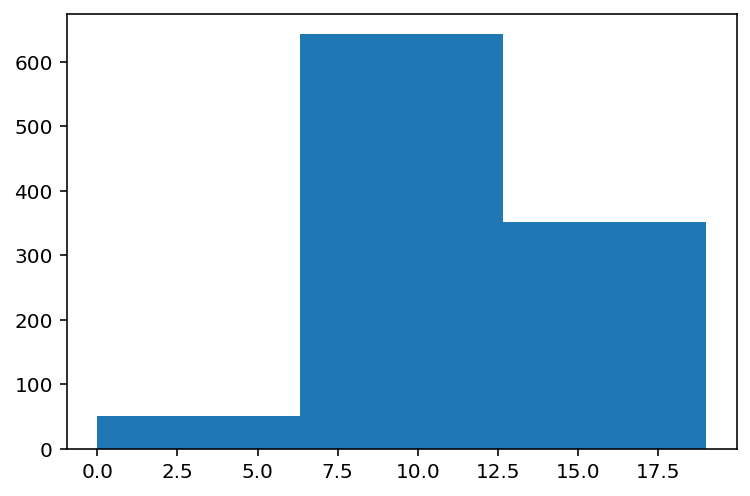

In [13]:
plt.hist(y, bins=3)

In [14]:
#Transforming labels into a categorical type, | 0 >= AND <=6.7 - BAIXO DESEMPENHO | 6.8 >= AND <= 13.4 - DESEMPENHO MEDIO | 13.5 >= AND <= 20

In [15]:
def buildClass():
    list = ['G1', 'G2', 'G3']
    for i in list:
        df.loc[(df[i] >= 0) & (df[i] <= 6.7), i] = 1
        df.loc[(df[i] >= 6.8) & (df[i] <= 13.4), i] = 2
        df.loc[(df[i] >= 13.5) & (df[i] <= 20), i] = 3
buildClass()

In [16]:
df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,0,1,1,4,4,3,0,2,...,4,3,4,1,1,3,6,1,1,1
1,0,17,0,1,0,1,1,3,4,2,...,5,3,3,1,1,3,4,1,1,1
2,0,15,0,0,0,1,1,3,4,3,...,4,3,2,2,3,3,10,2,2,2
3,0,15,0,1,0,4,2,1,2,0,...,3,2,2,1,1,5,2,3,3,3
4,0,16,0,1,0,3,3,4,4,0,...,4,3,2,1,2,5,4,1,2,2
